In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

In [2]:
import os
import pandas as pd
import time
from tsaug.visualization import plot
from IPython.display import Audio

In [3]:
import librosa

In [4]:
# Load audio file
audio_file = "data/instances/yes.wav"
y, sr = librosa.load(audio_file)

# Wave

check audio type

In [5]:
from caits.loading import wav_specs_check

In [6]:
audio_params = wav_specs_check("data/instances/yes.wav")

Sample rate: 16000 Hz
Mono


In [7]:
audio_params

{'nchannels': 1,
 'sampwidth': 2,
 'framerate': 16000,
 'nframes': 16000,
 'comptype': 'NONE',
 'compname': 'not compressed'}

In [8]:
length = audio_params["nframes"]
length

16000

In [9]:
sample_rate = audio_params["framerate"]

# Soundfile

In [10]:
import soundfile as sf

In [11]:
time_start = time.time()

In [12]:
data_sf, sr_sf = sf.read("data/instances/yes.wav")

In [13]:
load_time = time.time() - time_start
load_time

0.022475004196166992

In [14]:
type(data_sf)

numpy.ndarray

In [15]:
df_sf = pd.DataFrame(data_sf, columns=["mono"])

In [16]:
df_sf.head()

,mono
0,-0.000763
1,-0.000824
2,-0.000732
3,-0.000549
4,-0.000427


<Axes: >

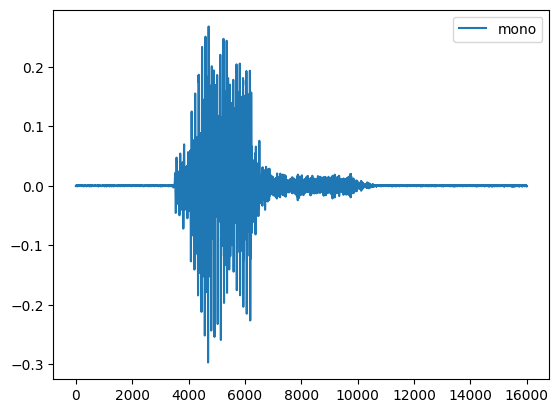

In [17]:
df_sf.plot()

(<Figure size 1600x200 with 1 Axes>, <Axes: >)

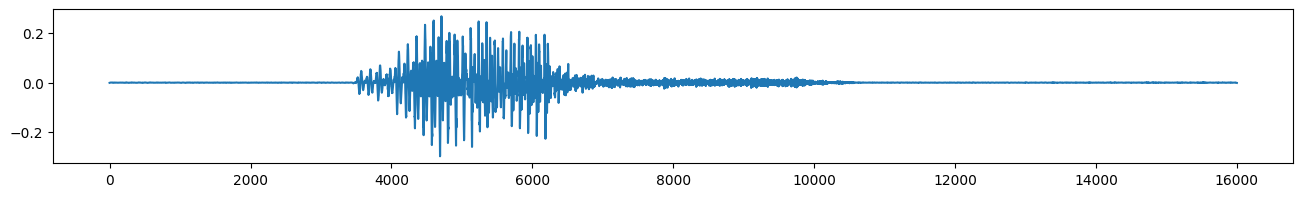

In [18]:
plot(data_sf)

In [19]:
# sd.play(data=data_sf, samplerate=sr_sf)

In [20]:
Audio(data_sf, rate=sr_sf)

# Add noise

In [21]:
from caits.augmentation import add_noise_ts

In [22]:
sig_noise = add_noise_ts(data_sf, scale=0.1)

In [23]:
sig_noise.shape

(16000,)

(<Figure size 1600x200 with 1 Axes>, <Axes: >)

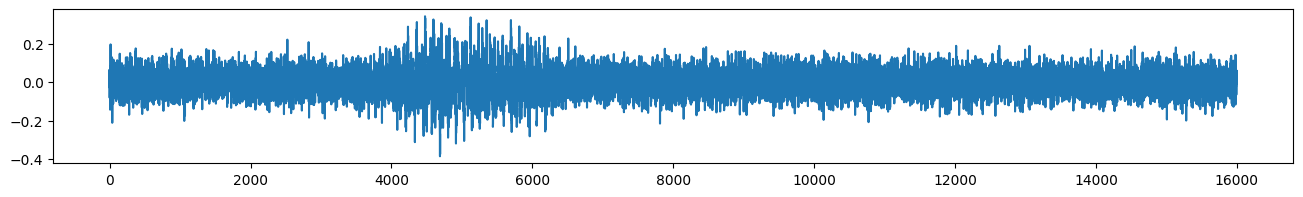

In [24]:
plot(sig_noise)

In [25]:
Audio(sig_noise, rate=sr_sf)

In [26]:
sig_noises = add_noise_ts(data_sf, scale=0.1, repeats=3)

In [27]:
sig_noises.shape

(3, 16000)

(<Figure size 1600x600 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

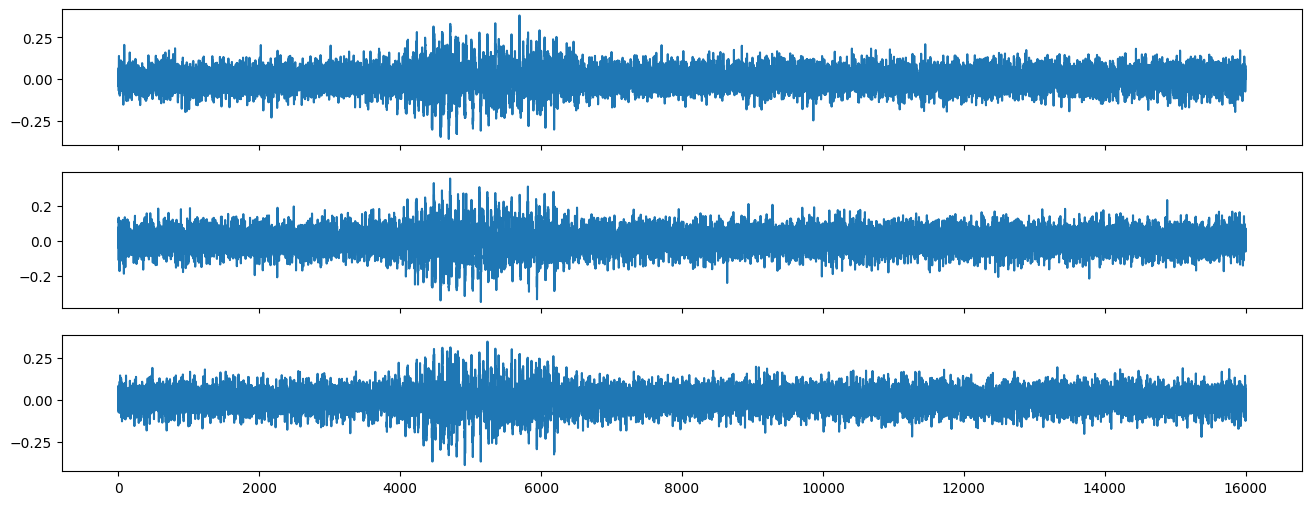

In [28]:
plot(sig_noises)

In [29]:
for row in sig_noises:
    print(row.shape)

(16000,)
(16000,)
(16000,)


In [30]:
arr_list = [row for row in sig_noises]

In [31]:
len(arr_list)

3

In [32]:
arr_list[0].shape

(16000,)

# Pitch shift

In [33]:
from librosa.effects import pitch_shift

In [34]:
sig_pitch_lib = pitch_shift(data_sf, sr=sr_sf, n_steps=10)

(<Figure size 1600x200 with 1 Axes>, <Axes: >)

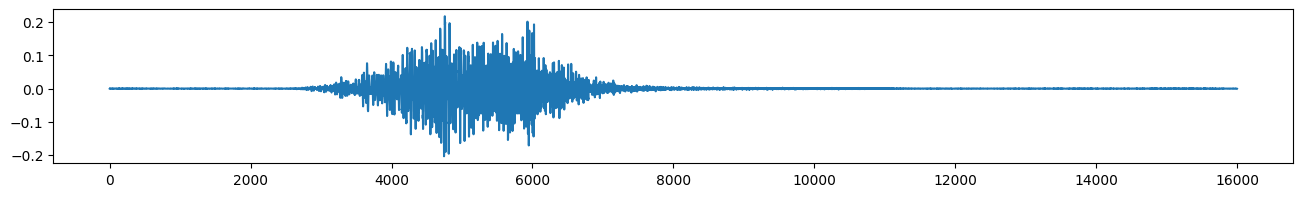

In [35]:
plot(sig_pitch_lib)

In [36]:
Audio(data_sf, rate=sr_sf)

In [37]:
Audio(sig_pitch_lib, rate=sr_sf)

In [38]:
from caits.augmentation import pitch_shift_ts

In [39]:
sig_pitch = pitch_shift_ts(data_sf, sr=sr_sf, n_steps=10)

(<Figure size 1600x200 with 1 Axes>, <Axes: >)

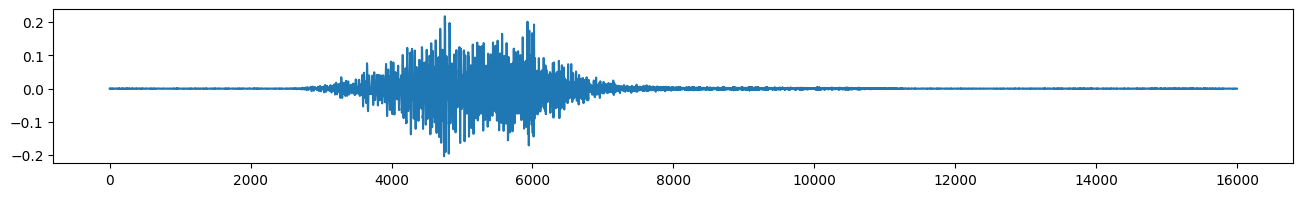

In [40]:
plot(sig_pitch)

In [41]:
Audio(sig_pitch, rate=sr_sf)

In [42]:
from librosa.effects import time_stretch

In [43]:
sig_stretch_lib = time_stretch(data_sf, rate=2)

(<Figure size 1600x200 with 1 Axes>, <Axes: >)

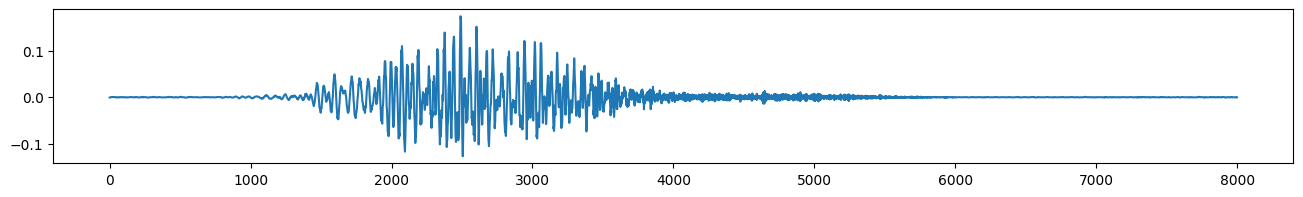

In [44]:
plot(sig_stretch_lib)

In [45]:
Audio(sig_stretch_lib, rate=sr_sf)

In [46]:
from caits.augmentation import time_stretch_ts

In [47]:
sig_stretch = time_stretch_ts(data_sf, rate=2)

(<Figure size 1600x200 with 1 Axes>, <Axes: >)

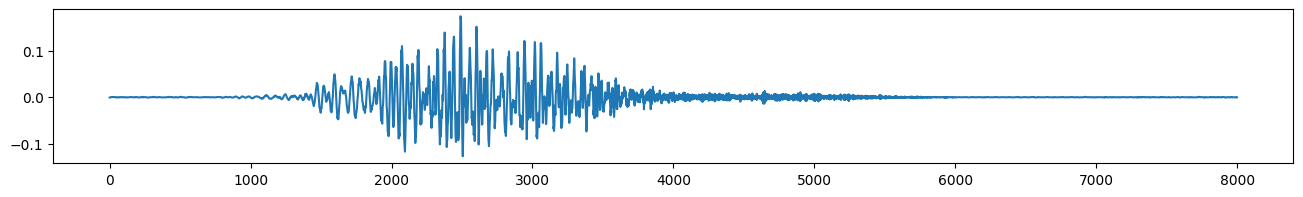

In [48]:
plot(sig_stretch)

In [49]:
Audio(sig_stretch, rate=sr_sf)